<a href="https://colab.research.google.com/github/rlrocha/paa/blob/main/ep6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático 6
Rafael Rocha

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Funções para a implementação do Hash Linear e Hash Duplo

In [2]:
def funcao_hash(x, m):
    
    h = np.mod(x, m)
    
    return h

In [3]:
def funcao_d(k, m):
    
    d = 1 + (np.mod(k, m))
    
    return d

In [4]:
def hash_linear(x, m, j):
    
    h = funcao_hash(x, m)
    hj = np.mod(h+j, m)
    
    return hj

In [5]:
def hash_duplo(x, m, j):
    
    h = funcao_hash(x, m)
    d = funcao_d(x, m)
    
    hj = np.mod(h+(j*d), m)
    
    return hj

In [6]:
def inserir_hash_linear(x, m, T):
    
    global colisao_linear
    
    h = funcao_hash(x, m)

    if T[h] == 0:
        T[h] = x
    else:
        colisao_linear+=1
        for j in range(m):
            hj = hash_linear(x, m, j)
            
            if T[hj] == 0:
                T[hj] = x
                break
    
    return T

In [7]:
def busca_hash_linear(x, m, T, c, vis=False):
    
    h = funcao_hash(x, m)

    if T[h] == c:
        if vis:
            print('Chave %d encontrada na posição %d da tabela hash.' % (c, h))
        return True
    else:

        for j in range(m):
            hj = hash_linear(x, m, j)

            if T[hj] == c:
                if vis:
                    print('Chave %d encontrada na posição %d da tabela hash.' % (c, hj))
                return True
        
        if vis:
            print('Chave %d não encontrada na tabela hash.' % c)
        return False

In [8]:
def inserir_hash_duplo(x, m, T):
    
    global colisao_duplo
    
    h = funcao_hash(x, m)

    if T[h] == 0:
        T[h] = x
    else:
        colisao_duplo+=1
        for j in range(m):
            hj = hash_duplo(x, m, j)
            
            if T[hj] == 0:
                T[hj] = x
                break
    
    return T

In [9]:
def busca_hash_duplo(x, m, T, c, vis=False):
    
    h = funcao_hash(x, m)

    if T[h] == c:
        if vis:
            print('Chave %d encontrada na posição %d da tabela hash.' % (c, h))
        return True
    else:

        for j in range(m):
            hj = hash_duplo(x, m, j)

            if T[hj] == c:
                if vis:
                    print('Chave %d encontrada na posição %d da tabela hash.' % (c, hj))
                return True
        
        if vis:
            print('Chave %d não encontrada na tabela hash.' % c)
        return False

## Exemplo de inserção e busca nos Hash Linear e  Hash Duplo

In [10]:
x_lista = [10, 22, 31, 4, 15, 28, 59]

m = 11 # Tamanho da tabela

T_linear = np.zeros(m, dtype=np.int64) # Tabela Hash (linear)
T_duplo = np.zeros(m, dtype=np.int64) # Tabela Hash (duplo)

colisao_linear = 0
colisao_duplo = 0
for x in x_lista:

    h = funcao_hash(x, m)
    
    T_linear = inserir_hash_linear(x, m, T_linear)
    T_duplo = inserir_hash_duplo(x, m, T_duplo)
    
print('Tabela Hash (linear): ', T_linear)
print('Colisões (linear): ', colisao_linear)

print('\nTabela Hash (duplo): ', T_duplo)
print('Colisões (duplo): ', colisao_duplo)

c = 15 # Elemento a ser buscado

_ = busca_hash_linear(x, m, T_linear, c, vis=True)
_ = busca_hash_duplo(x, m, T_duplo, c, vis=True)

Tabela Hash (linear):  [22  0  0  0  4 15 28 59  0 31 10]
Colisões (linear):  2

Tabela Hash (duplo):  [22  0  0 15  4  0 28  0 59 31 10]
Colisões (duplo):  2
Chave 15 encontrada na posição 5 da tabela hash.
Chave 15 encontrada na posição 3 da tabela hash.


## Análise da Complexidade dos Algoritmos
Para a análise da complexidade dos algoritmos, são geradas aleatoriamente chaves que variam entre 1 a 2n, onde *n* é o número de chaves a serem inseridas. Além disso, o tamanho da tabela hash é igual *n*.

### Análise 1
Ao analisar o resultado de 20 repetições da inserção de 10.000 chaves aleatórias, nota-se que embora a média de colisões no Hash Linear seja maior que o Hash Duplo, a média do tempo de inserção do Hash Duplo é significativamente superior ao Hash Linear. Nota-se também, que, em média, nem todas as chaves são inseridas no Hash Duplo, por outro lado, a tabela Hash do Hash Linear é preenchida em todas as 20 repetições.

In [14]:
repeticoes = 20 # Número de repetições
n = 1000 # Número de elementos inseridos

# Número de colisões em cada repetição
colisao_linear_lista = []
colisao_duplo_lista = []

# Tempo de inserção em cada repetição
tempo_linear_lista = []
tempo_duplo_lista = []

# Número de elementos na tabela hash
elemento_linear_lista = []
elemento_duplo_lista = []

for i in range(repeticoes):
    
    x_lista = list(np.random.permutation(np.arange(1, (n*2)+1, 1)))

    x_lista = x_lista[0:n]

    m = n # Tamanho da tabela

    T_linear = np.zeros(m, dtype=np.int64) # Tabela Hash (linear)
    T_duplo = np.zeros(m, dtype=np.int64) # Tabela Hash (duplo)

    colisao_linear = 0
    colisao_duplo = 0
    
    tempo_linear = 0
    tempo_duplo = 0
    
    for x in x_lista:

        h = funcao_hash(x, m)
        
        start_time = time.time()
        T_linear = inserir_hash_linear(x, m, T_linear)
        tempo_linear = tempo_linear + time.time() - start_time # Tempo de inserção (hash linear)
        
        start_time = time.time()
        T_duplo = inserir_hash_duplo(x, m, T_duplo)
        tempo_duplo = tempo_duplo + time.time() - start_time # Tempo de inserção (hash duplo)
    
    colisao_linear_lista.append(colisao_linear)
    colisao_duplo_lista.append(colisao_duplo)
    
    tempo_linear_lista.append(tempo_linear)
    tempo_duplo_lista.append(tempo_duplo)
    
    elemento_linear_lista.append(np.count_nonzero(T_linear!=0))
    elemento_duplo_lista.append(np.count_nonzero(T_duplo!=0))

In [15]:
print('Média colisões (hash linear): ', np.mean(colisao_linear_lista))
print('Média tempo (ms) de inserção (hash linear): ', np.mean(tempo_linear_lista)*1000)
print('Média de elementos na tabela (hash linear):', np.mean(elemento_linear_lista))

print('\nMédia colisões (hash duplo): ',  np.mean(colisao_duplo_lista))
print('Média tempo (ms) de inserção (hash duplo): ', np.mean(tempo_duplo_lista)*1000)
print('Média de elementos na tabela (hash duplo):', np.mean(elemento_duplo_lista))

Média colisões (hash linear):  394.15
Média tempo (ms) de inserção (hash linear):  66.18887186050415
Média de elementos na tabela (hash linear): 1000.0

Média colisões (hash duplo):  382.4
Média tempo (ms) de inserção (hash duplo):  499.7231721878052
Média de elementos na tabela (hash duplo): 935.05


### Análise 2

In [16]:
n_lista = np.arange(100, 10100, 100)
#n_lista = np.arange(100, 1100, 100)

# Número de colisões
colisao_linear_lista = []
colisao_duplo_lista = []

# Tempo de inserção
tempoInsercao_linear_lista = []
tempoInsercao_duplo_lista = []

# Tempo de busca
tempoBusca_linear_lista = []
tempoBusca_duplo_lista = []

for n in n_lista:
    
    x_lista = list(np.random.permutation(np.arange(1, (2*n)+1, 1)))
    
    #x_lista = list(np.random.permutation(np.arange(1, 100001, 1)))

    x_lista = x_lista[0:n]
    
    m = n # Tamanho da tabela
    
    T_linear = np.zeros(m, dtype=np.int64) # Tabela Hash (linear)
    T_duplo = np.zeros(m, dtype=np.int64) # Tabela Hash (duplo)

    colisao_linear = 0
    colisao_duplo = 0
    
    tempoInsercao_linear = 0
    tempoInsercao_duplo = 0
    
    tempoBusca_linear = 0
    tempoBusca_duplo = 0
    
    for x in x_lista:

        h = funcao_hash(x, m)
        
        start_time = time.time()
        T_linear = inserir_hash_linear(x, m, T_linear)
        tempoInsercao_linear = tempoInsercao_linear + time.time() - start_time # Tempo de inserção (hash linear)
        
        start_time = time.time()
        T_duplo = inserir_hash_duplo(x, m, T_duplo)
        tempoInsercao_duplo = tempoInsercao_duplo + time.time() - start_time # Tempo de inserção (hash duplo)
    
    c = np.random.choice(x_lista) # Elemento aleatório a ser buscado
    
    start_time = time.time()
    busca_hash_linear(x, m, T_linear, c)
    tempoBusca_linear = time.time() - start_time
    
    start_time = time.time()
    busca_hash_duplo(x, m, T_duplo, c)
    tempoBusca_duplo = time.time() - start_time
    
    colisao_linear_lista.append(colisao_linear)
    colisao_duplo_lista.append(colisao_duplo)
    
    tempoInsercao_linear_lista.append(tempoInsercao_linear)
    tempoInsercao_duplo_lista.append(tempoInsercao_duplo)
    
    tempoBusca_linear_lista.append(tempoBusca_linear*1000)
    tempoBusca_duplo_lista.append(tempoBusca_duplo*1000)

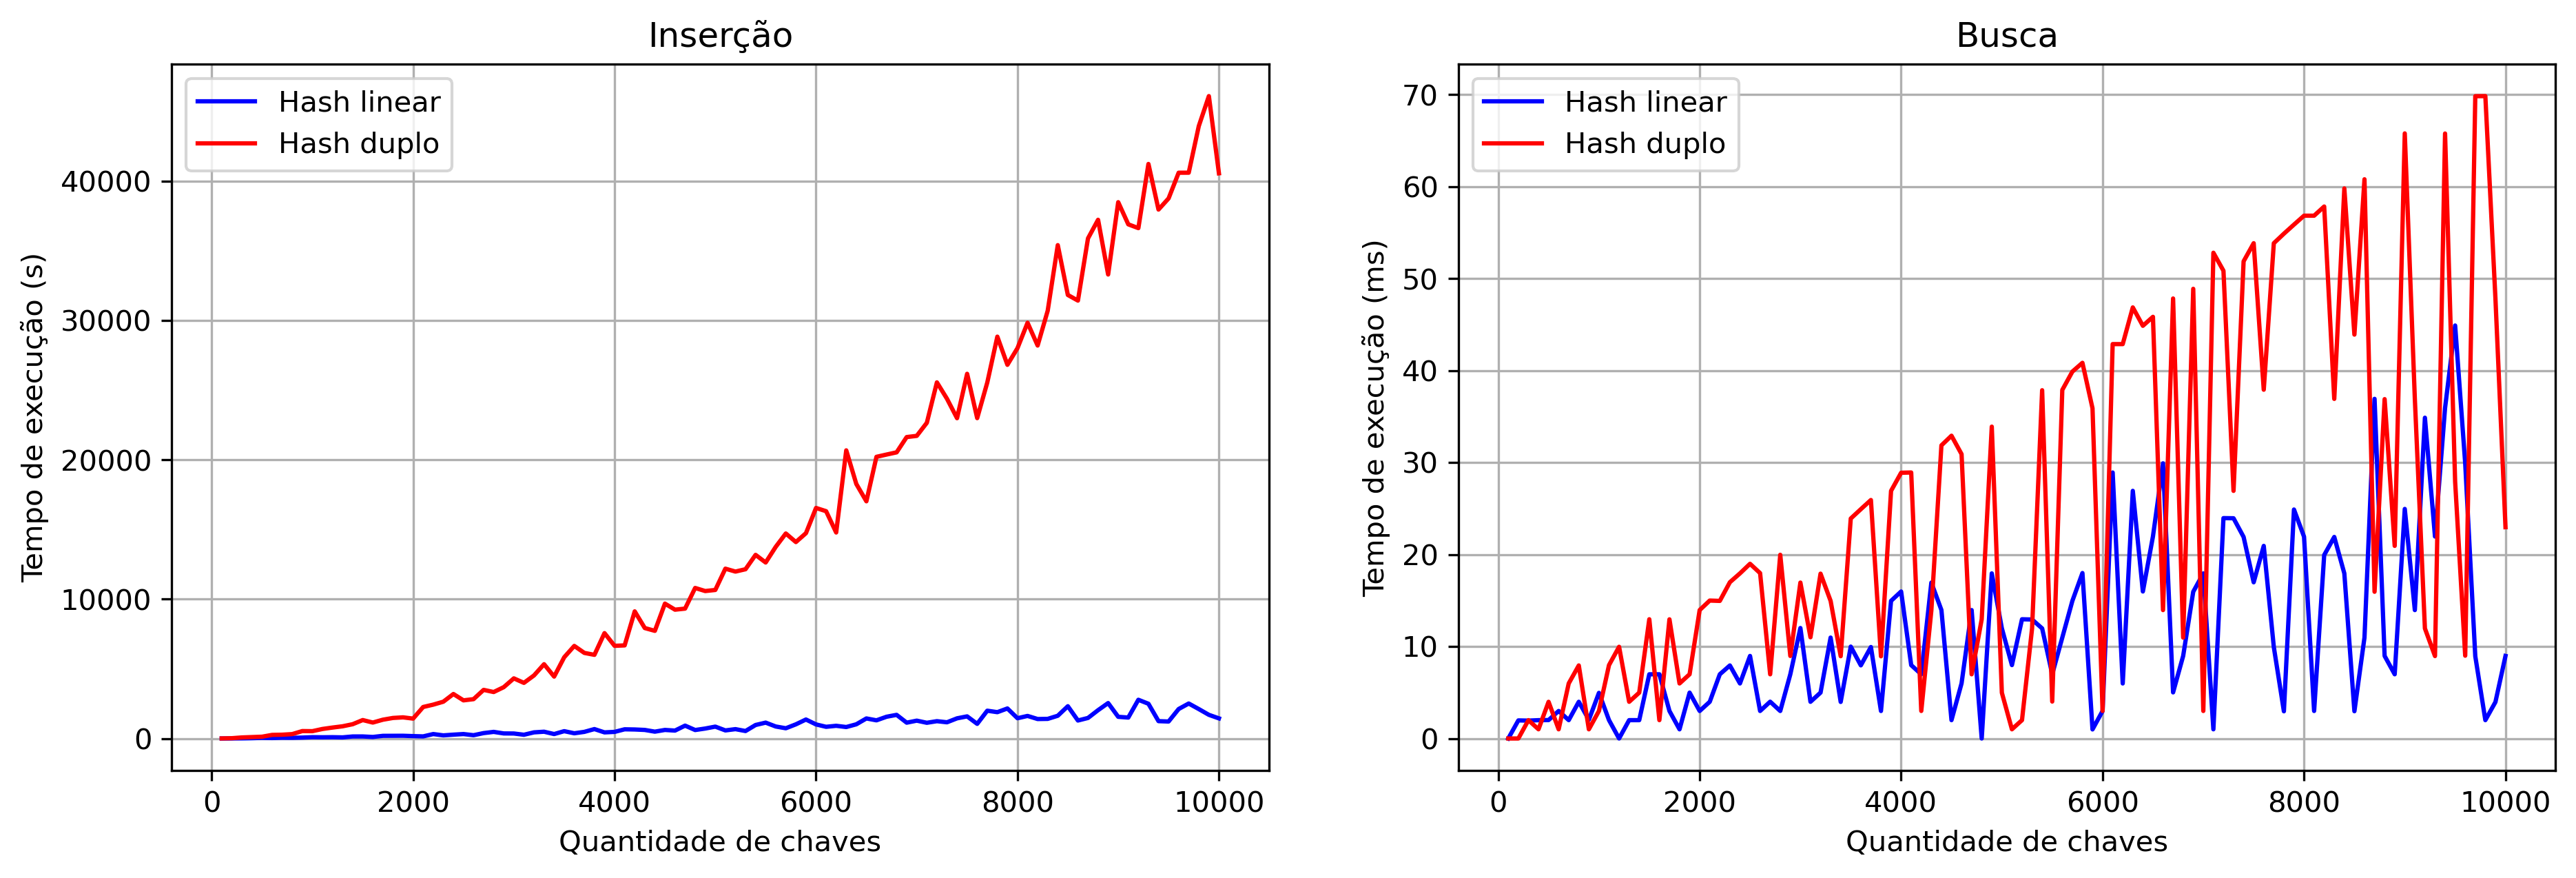

In [18]:
fig_luz, axes = plt.subplots(1,2, figsize=(8,4), dpi=300)
plt.tight_layout()

axes[0].plot(n_lista, tempoInsercao_linear_lista, color='blue')
axes[0].plot(n_lista, tempoInsercao_duplo_lista, color='red')
axes[0].set_xlabel('Quantidade de chaves')
axes[0].set_ylabel('Tempo de execução (s)')
axes[0].set_title('Inserção')
axes[0].grid()
axes[0].legend(['Hash linear', 'Hash duplo'])

axes[1].plot(n_lista, tempoBusca_linear_lista, color='blue')
axes[1].plot(n_lista, tempoBusca_duplo_lista, color='red')
axes[1].set_xlabel('Quantidade de chaves')
axes[1].set_ylabel('Tempo de execução (ms)')
axes[1].set_title('Busca')
axes[1].grid()
axes[1].legend(['Hash linear', 'Hash duplo'])

plt.subplots_adjust(right=1.5)

#plt.savefig('resultados/ep5/ep5_analise1.png', dpi=300, bbox_inches = 'tight')
plt.show()